In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/Expanded_data_with_more_features.csv')

In [ ]:
if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)

In [ ]:
print(data.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


<Axes: xlabel='WklyStudyHours', ylabel='MathScore'>

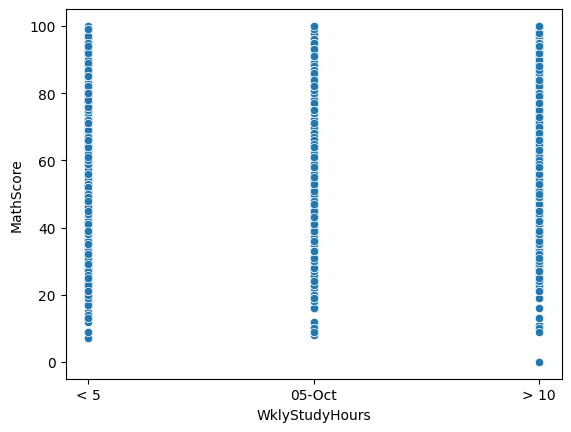

In [ ]:
sns.scatterplot(x='WklyStudyHours', y='MathScore', data=data)

Text(0, 0.5, 'Math Score')

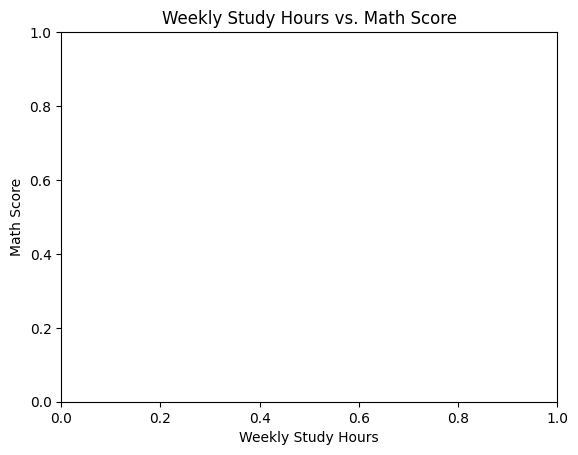

In [ ]:
plt.title('Weekly Study Hours vs. Math Score')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Math Score')

In [ ]:
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Load the data into a Pandas DataFrame
data = pd.read_csv('/content/Expanded_data_with_more_features.csv')

# check for missing values
print(data.isnull().sum())

# replace missing values with mean value of that column
data.fillna(data.mean(), inplace=True)

# select input and output variables
X = data.drop(['MathScore'], axis=1) # input variables
y = data['MathScore'] # output variable

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


<ipython-input-7-ecba8f2ec4db>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
import numpy as np

# Replace '< 5' with NaN
data['WklyStudyHours'] = data['WklyStudyHours'].replace('< 5', np.nan)

# Replace '> 10' with 11
data['WklyStudyHours'] = data['WklyStudyHours'].replace('> 10', 11)

# Replace '05-Oct' with 2.5
data['WklyStudyHours'] = data['WklyStudyHours'].replace('05-Oct', 2.5)

# Convert the column to float type
data['WklyStudyHours'] = data['WklyStudyHours'].astype(float)

# Check the data types of all columns
print(data.dtypes)

Unnamed: 0               int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours         float64
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
if data['WklyStudyHours'].isnull().values.any():
    # Fill NaN values with the median value of X
    median_X = np.nanmedian(data['WklyStudyHours'])
    data['WklyStudyHours'].fillna(median_X, inplace=True)

# Split the data into input and output variables
X = data['WklyStudyHours'].values.reshape(-1, 1)
y = data['MathScore'].values.reshape(-1, 1)

# Train a linear regression model on the data
model = LinearRegression().fit(X, y)

In [ ]:
print(model.coef_, model.intercept_)


[[0.3030003]] [65.3636518]


In [ ]:
print('Regression Coefficients:')
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Regression Coefficients:
Intercept: [65.3636518]
Slope: [[0.3030003]]


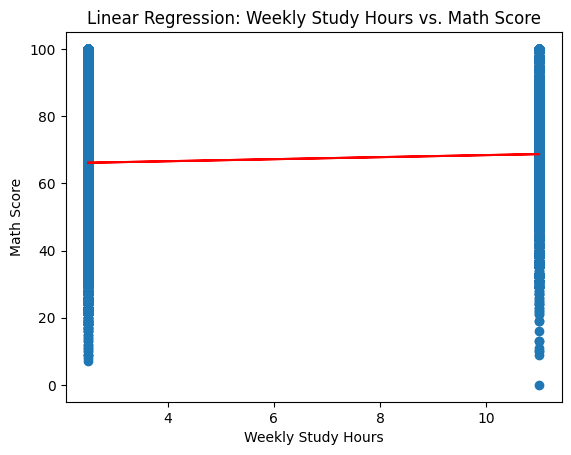

In [ ]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title('Linear Regression: Weekly Study Hours vs. Math Score')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Math Score')
plt.show()

<Axes: xlabel='WklyStudyHours', ylabel='MathScore'>

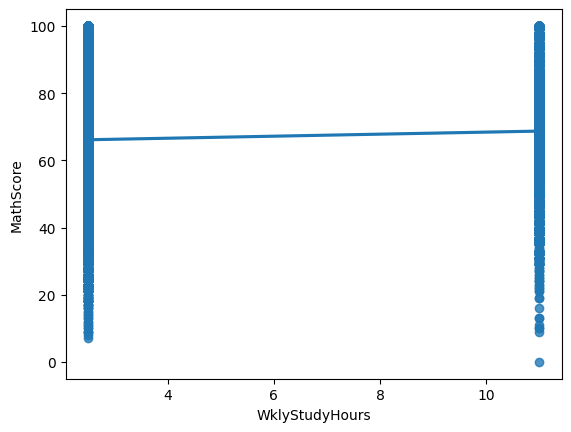

In [ ]:
sns.regplot(x='WklyStudyHours', y='MathScore', data=data)

Text(0.5, 1.0, 'Histogram of Mathscore')

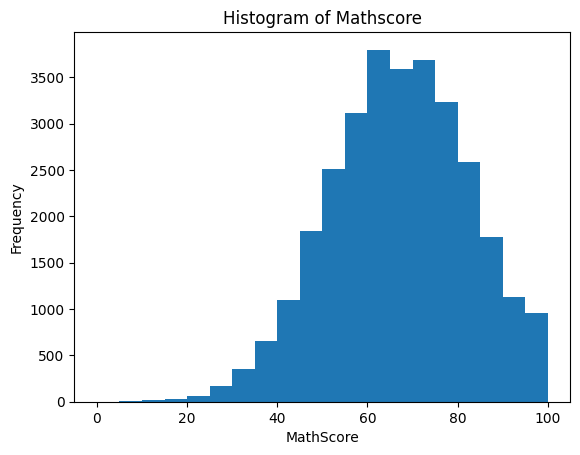

In [ ]:
plt.hist(data['MathScore'], bins=20)
plt.xlabel('MathScore')
plt.ylabel('Frequency')
plt.title('Histogram of Mathscore')

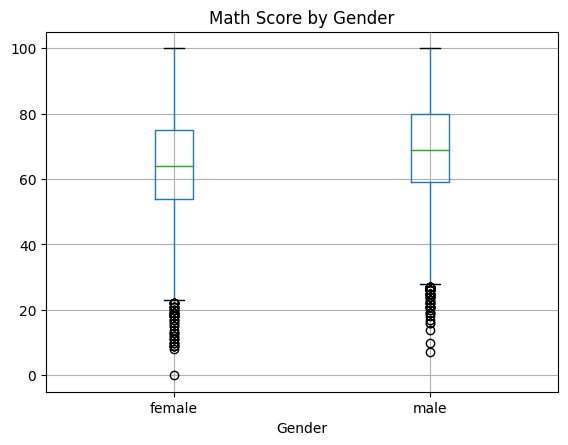

In [ ]:
data.boxplot(column='MathScore', by='Gender')
plt.title('Math Score by Gender')
plt.suptitle('')  # remove the redundant title
plt.show()

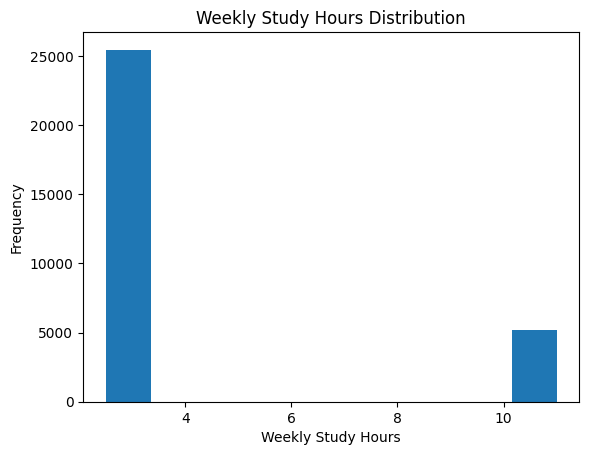

In [ ]:
# plt.hist(data['WklyStudyHours'], bins=10)
# plt.title('Weekly Study Hours Distribution')
# plt.xlabel('Weekly Study Hours')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Train the linear regression model on X and y
X = data['WklyStudyHours'].values.reshape(-1,1)
y = data['MathScore'].values.reshape(-1,1)
model = LinearRegression().fit(X, y)

# Use the trained model to make predictions on X
y_pred = model.predict(X)

# Calculate mean squared error (MSE) and R-squared
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)


Mean Squared Error (MSE): 235.03658267048138
R-squared: 0.003962131409981362


In [ ]:
from sklearn.model_selection import cross_val_score

# Define the linear regression model
model = LinearRegression()

# Perform k-fold cross-validation
X = data['WklyStudyHours'].values.reshape(-1,1)
y = data['MathScore'].values.reshape(-1,1)
scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation scores: [0.00250217 0.00337449 0.00556308 0.00356147 0.00208778]
Mean score: 0.0034177954504054364
Standard deviation: 0.001202669915598897


<ipython-input-24-816de865ded4>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


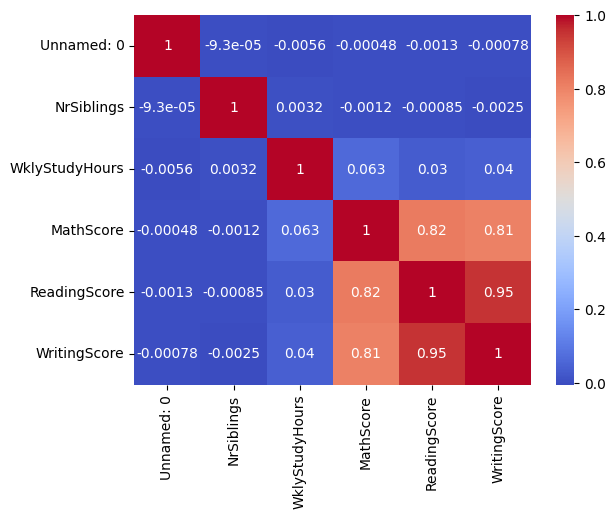

In [ ]:
import pandas as pd
import seaborn as sns


# Compute the correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Identify the features that are highly correlated with the target variable
target_corr = corr_matrix['MathScore']
important_features = target_corr[abs(target_corr) > 0.5].index.tolist()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Load the dataset and split it into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest model
rf = RandomForestRegressor()

# Define the hyperparameters to tune
params = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf, params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Use the best hyperparameters to fit a new model and evaluate its performance on the test set
best_rf = RandomForestRegressor(**grid_search.best_params_)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10}
Best score: 0.0032678210795982878
MSE: 230.7791677511307


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
<ipython-input-26-8c6775646bea>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf.fit(X_train, y_train)


<ipython-input-34-1b23c4c017a3>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


LinearRegression -- Mean Squared Error: 0.00, R-squared: 1.00
DecisionTreeRegressor -- Mean Squared Error: 0.00, R-squared: 1.00
RandomForestRegressor -- Mean Squared Error: 0.00, R-squared: 1.00
SVR -- Mean Squared Error: 0.32, R-squared: 1.00


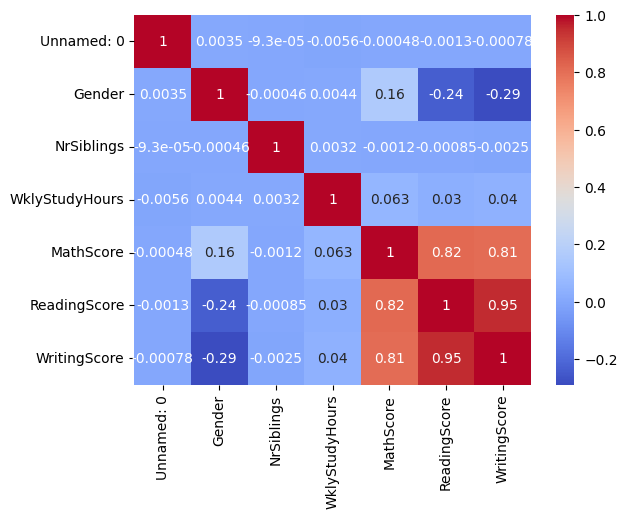

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns



# Convert the 'gender' column to binary values
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

# # Convert the 'education_level' column to ordinal values
# ordinal_map = {'low': 1, 'medium': 2, 'high': 3}
# data['education_level'] = data['education_level'].map(ordinal_map)

# Visualize the correlation matrix as a heatmap
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Identify the features that are highly correlated with the target variable
target_corr = corr_matrix['MathScore']
important_features = target_corr[abs(target_corr) > 0.5].index.tolist()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[important_features], 
                                                    data['MathScore'], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Initialize the models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
svm_model = SVR()

# Train and evaluate each model
for model in [lr_model, dt_model, rf_model, svm_model]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__} -- Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}")



In [ ]:
`

In [ ]:
# Replace missing values with the mean of the column
df.fillna(df.mean(), inplace=True)


<ipython-input-10-58b7e957fc2c>:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
df = pd.get_dummies(df, columns=['Gender'])

In [1]:
# from sklearn.preprocessing import StandardScaler

# # Standardize the 'WklyStudy' column
# scaler = StandardScaler()
# df['WklyStudyHours'] = scaler.fit_transform(df[['WklyStudyHours']])


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dff = pd.read_csv('/content/Expanded_data_with_more_features.csv')

In [ ]:
dff['AvgScore'] = dff[['MathScore','ReadingScore','WritingScore']].mean(axis=1).round(2)
groupby1 = dff.groupby(['Gender','EthnicGroup'])[['MathScore','ReadingScore','WritingScore','AvgScore']].mean()
groupby1.style.background_gradient()

[Text(0.5, 0, '191.727'),
 Text(0.5, 0, '197.071'),
 Text(0.5, 0, '204.072'),
 Text(0.5, 0, '209.789'),
 Text(0.5, 0, '216.86'),
 Text(0.5, 0, '224.526')]

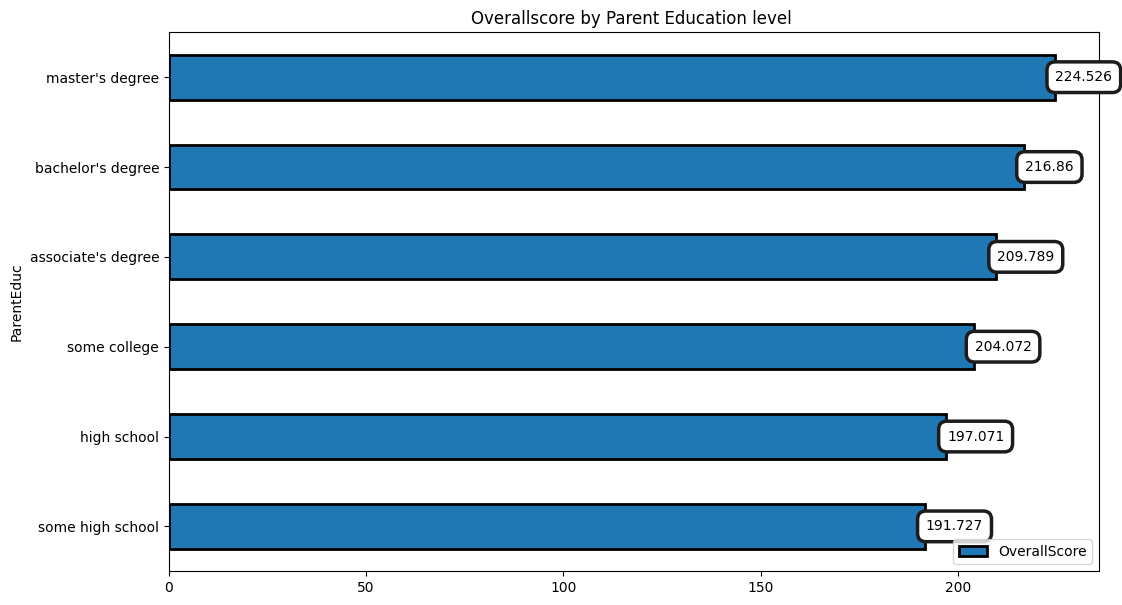

In [ ]:
dff['OverallScore']=(dff['MathScore']+dff['ReadingScore']+dff['WritingScore'])
pv4=pd.pivot_table(dff,index='ParentEduc',values=['OverallScore'])
pv4=pv4.sort_values(by=['OverallScore'],ascending=True)
p4=pv4.plot(kind='barh',y=['OverallScore'],edgecolor='black',linewidth=2,figsize=(12,7),title='Overallscore by Parent Education level ')
p4.bar_label(p4.containers[0], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})

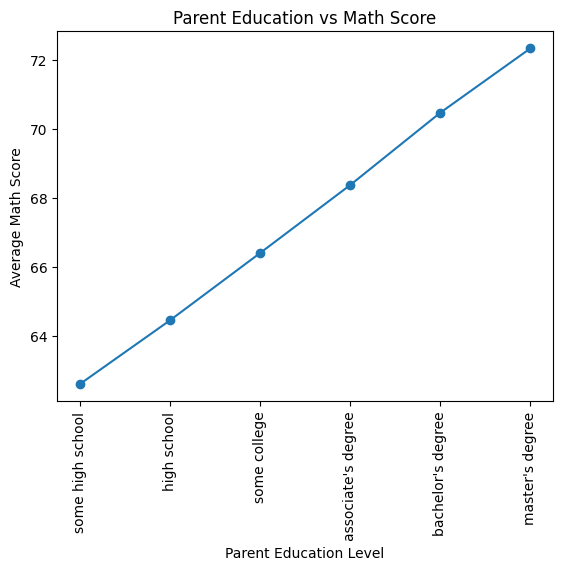

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('Expanded_data_with_more_features.csv')

# Group data by Parent Education level and calculate mean Math Score for each group
grouped_data = data.groupby('ParentEduc')['MathScore'].mean().reset_index()

# Sort the data by the mean Math Score in increasing order
grouped_data = grouped_data.sort_values(by='MathScore') 

# Create a line plot
plt.plot(grouped_data['ParentEduc'], grouped_data['MathScore'], marker='o')

# Add axis labels and a title
plt.xlabel('Parent Education Level')
plt.ylabel('Average Math Score')
plt.title('Parent Education vs Math Score')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

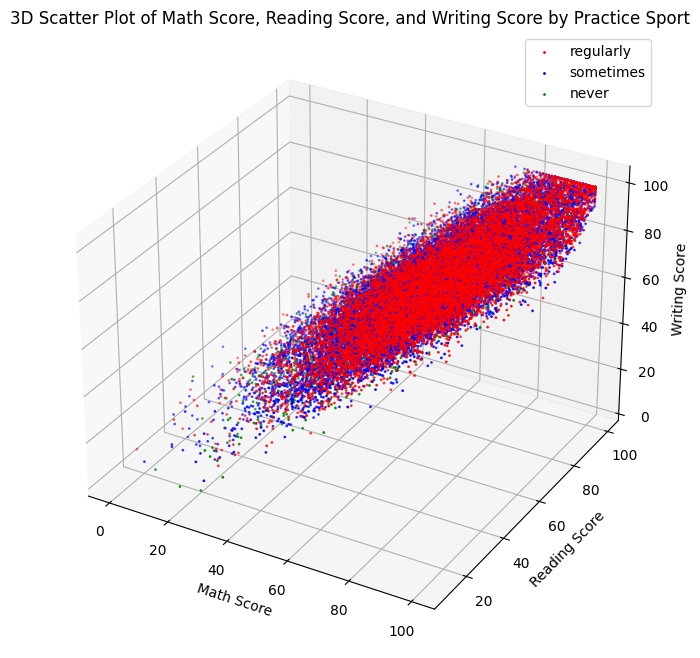

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
data = pd.read_csv('Expanded_data_with_more_features.csv')

# Create a dictionary to map Parent Marital Status to colors
color_dict = {'regularly': 'red', 'sometimes': 'blue', 'never': 'green' }

# Create a 3D scatter plot of Math Score vs Reading Score vs Writing Score
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for status in color_dict.keys():
    ax.scatter(data[data['PracticeSport'] == status]['MathScore'], 
               data[data['PracticeSport'] == status]['ReadingScore'], 
               data[data['PracticeSport'] == status]['WritingScore'], 
               c=color_dict[status], label=status, s=1)

# Add axis labels and a title
ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')
ax.set_zlabel('Writing Score')
ax.set_title('3D Scatter Plot of Math Score, Reading Score, and Writing Score by Practice Sport')
# Add a legend
ax.legend()

# Show the plot
plt.show()

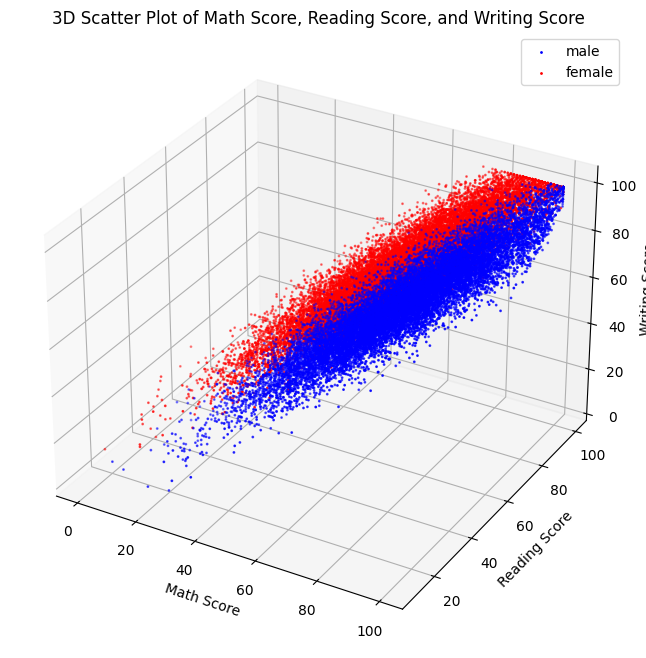

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
data = pd.read_csv('Expanded_data_with_more_features.csv')

# Create a color map for gender
colors = {'male': 'blue', 'female': 'red'}

# Create a 3D scatter plot of Math Score vs Reading Score vs Writing Score
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for gender in ['male', 'female']:
    gender_data = data[data['Gender'] == gender]
    ax.scatter(gender_data['MathScore'], gender_data['ReadingScore'], gender_data['WritingScore'], s=1, color=colors[gender], label=gender)

# Add axis labels and a title
ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')
ax.set_zlabel('Writing Score')
ax.set_title('3D Scatter Plot of Math Score, Reading Score, and Writing Score')

# Add a legend
ax.legend()

# Show the plot
plt.show()

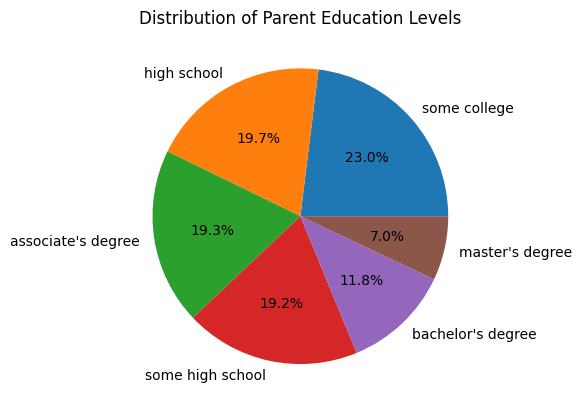

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('Expanded_data_with_more_features.csv')

# Get counts of each education level
edu_counts = data['ParentEduc'].value_counts()

# Create pie chart
plt.pie(edu_counts, labels=edu_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Parent Education Levels')

# Show the chart
plt.show()

In [2]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=04c43b1cdfe904a914ca33ac0b1189930fb4104d49f9af27a401575cf80e56ad
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
